### Getting imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sys
sys.path.append('../')

from utils import read_list, normal_distribution, normalize, normed_dists_to_sims

## Retrieve the list of diversity and novelty from the text files

In [2]:
jac_real_diversities = read_list('jaccard_diversities_real.txt')
jac_real_novelties = read_list('jaccard_novelties_real.txt')

jac_fake_diversities = read_list('jaccard_diversities_fake3.txt')
jac_fake_novelties = read_list('jaccard_novelties_fake3.txt')

print(len(jac_real_diversities), len(jac_real_novelties))

10785 10785


In [48]:
def get_scatter_plot(data_x, data_y, data_x1, data_y1):
    """ Scatter plot of novelties vs diversities. 
    """
    plt.scatter(data_x, data_y, color='darkorange', marker='+', label='Fake text', alpha=1)
    plt.scatter(data_x1, data_y1, color='blue', marker='x', label='Real text', alpha=0.1)

    plt.title('{} vs {} of real and fake sentences'.format("Novelties", "Diversities"))
    plt.xlabel('Diversity of sentence')
#     plt.xlim(0, 1)
#     plt.ylim(0, 1)
    plt.ylabel('Novelty of sentence')
    plt.legend(loc='upper left')
    plt.show()

### Scatter plot of novelties vs diversities

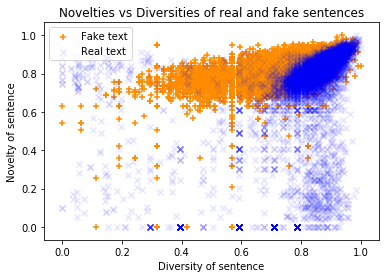

In [49]:
get_scatter_plot(jac_fake_diversities, jac_fake_novelties, jac_real_diversities, jac_real_novelties)

## Real text: Distribution of novelties and diversities

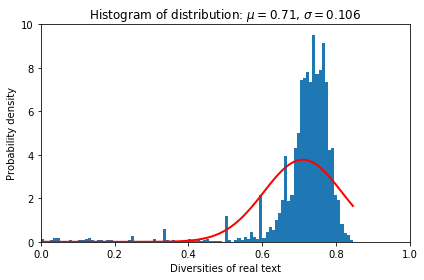

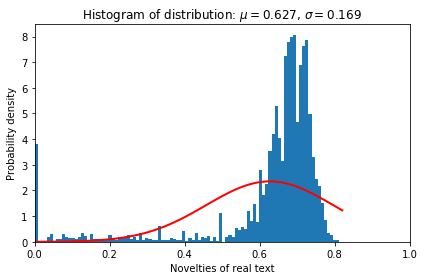

In [5]:
normal_distribution(jac_real_diversities, 'Diversities of real text')
normal_distribution(jac_real_novelties, 'Novelties of real text')

## Fake text: Distribution of novelties and diversities

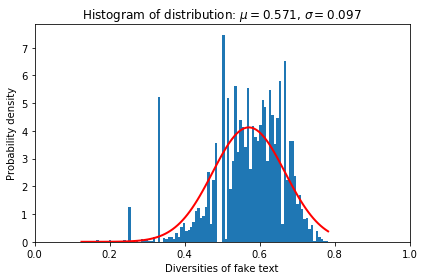

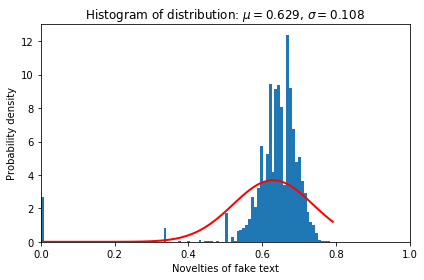

In [6]:
normal_distribution(jac_fake_diversities, 'Diversities of fake text')
normal_distribution(jac_fake_novelties, 'Novelties of fake text')

In [7]:
# Normalisation

In [8]:
import sys
sys.path.insert(0, '../')

from utils import read_list, normal_distribution, get_scatter_plot, normalize, inverse_distances, normed_dists_to_sims

# Transform distances to similarities
jac_real_diversities = normed_dists_to_sims(normalize(jac_real_diversities))
jac_real_novelties = normed_dists_to_sims(normalize(jac_real_novelties))
jac_fake_diversities = normed_dists_to_sims(normalize(jac_fake_diversities))
jac_fake_novelties = normed_dists_to_sims(normalize(jac_fake_novelties))

assert(len(jac_fake_diversities) == len(jac_fake_novelties))
assert(len(jac_real_diversities) == len(jac_real_novelties))

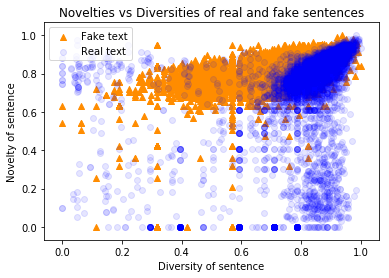

In [16]:
get_scatter_plot(jac_fake_diversities, jac_fake_novelties, jac_real_diversities, jac_real_novelties)

In [19]:
def jaccard_distance_words(sentence, ref_sentence):
    """Calculate the Jaccard Similarity between two sentences using sets of words.
    """
    set1 = set(sentence.split())  # split to get words
    set2 = set(ref_sentence.split())
    intersection = set1.intersection(set2)
    union = set1.union(set2)

    # print('set1: ', set1)
    # print('set2: ', set2)

    if len(union) == 0:
        return 1
    else:
        return 1 -  (len(intersection) / len(union))

In [38]:
def diversity(sentence: str, tokenized_sentences: str, similarity_metric: str) -> float:
    """ Calculate the diversity of sentence compared with a given corpus/document.
    """
    # sentences = nltk.sent_tokenize(document)
    max_sim_sentence = ''
    sentence = sentence.lower()
    tokenized_sentences = [sent.lower() for sent in tokenized_sentences]

    if similarity_metric == 'jaccard':

        max_sim = -np.inf
        for ref_sentence in tokenized_sentences:
            if sentence != ref_sentence:
                jaccard_sim = jaccard_similarity_words(sentence, ref_sentence)
                if jaccard_sim > max_sim:
                    max_sim_sentence = ref_sentence
                    max_sim = jaccard_sim

        return 1 - max_sim, max_sim_sentence

    elif similarity_metric == 'levenshtein':
        
        min_edit_distance = np.inf
        for ref_sentence in tokenized_sentences:
            if sentence != ref_sentence:
                edit_distance = levenshtein(sentence, ref_sentence) \
                                    / max(len(sentence), len(ref_sentence))

                if edit_distance < min_edit_distance:
                    max_sim_sentence = ref_sentence
                    min_edit_distance = edit_distance
                    # maximum similarity is minimum edit distance
                    # max_sim = min_edit_distance 

        return min_edit_distance, max_sim_sentence

In [45]:
import pandas as pd
METRIC = "jaccard"

labelled_real=f'{METRIC}_labelled_real_text.csv'
labelled_fake=f'{METRIC}_labelled_fake_text.csv'

real_data = pd.read_csv(labelled_real)
fake_data = pd.read_csv(labelled_fake)

real_data['text'] = real_data['text'].astype('str')
mask = (real_data['text'].str.len() >= 20)
real_data = real_data[mask]

fake_data['text'] = fake_data['text'].astype('str')
mask = (fake_data['text'].str.len() >= 20)
fake_data = fake_data[mask]

In [46]:
def find_plot_diversities(test_sentences, corpus_sentences, metric):
    diversities = list()
    num_of_tests = len(test_sentences)
#     print("Example corpus sentence: ", corpus_sentences[0])
#     print("Example test sentence: ", test_sentences[0])

    for sentence in test_sentences:
        div, max_sim_sentence = diversity(sentence, corpus_sentences, metric)
        print(sentence, '\n', div, '\n', max_sim_sentence, '\n\n\n')
        diversities.append(div)

    # Minimum diversity can be used to then find the sentence and potentially
    # discover reasons causing diversity to decrease
    
    max_diversity = max(diversities)
    max_diversity_idx = diversities.index(max_diversity)
    print("\n\nMax diversity: {}".format(max_diversity))
    print("Sentence with min diversity: {}".format(test_sentences[max_diversity_idx]))
    
    min_diversity = min(diversities)
    min_diversity_idx = diversities.index(min_diversity)
    print("\n\nMin diversity: {}".format(min_diversity))
    print("Sentence with min diversity: {}".format(test_sentences[min_diversity_idx]))
    # print("Novelties for {} sentences: \n {}".format(num_of_tests, diversities))

In [47]:
find_plot_diversities(fake_data['text'][:100], fake_data['text'], metric='jaccard')

the scottish government has won and not necessarily only the federal reserve fund , and a real estate deficit is the best way . 
 0.6451612903225806 
 the unprecedented research has not achieved , and is the case that are a real majority of the work of the size of the scottish government . 



the more of the main people do not to not pay attention to the state ' s streets , along with the black . 
 0.5862068965517242 
 `` it is a possibility , but so all of the people ' s best , and not to do with more people . 



it was a shame , but when they put it up for him , i thought i ' m not really happy to see him . 
 0.6129032258064516 
 `` i thought he to see me to me , but i ' m not sure important to me i ' m not sure i was a great actor , '' he said . 



`` it took me , but that is a good thing , but i ' m not sure she is so angry . 
 0.40740740740740744 
 it ' s a `` good thing , but i ' m not sure that you wanted to help me , '' she said . 



`` i didn ' t have that a citizen of the